In [ ]:
# 📘 Boston Housing Regression Notebook
# Author: Vinay Yadav
# Objective: Predict median value of owner-occupied homes (MEDV)

# --- 📦 Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# 📝 Load Dataset
df = pd.read_csv(r'C:\Users\yadav\Documents\Projects\ML-Algorithms-Tutorial\datasets\regression\boston_housing.csv')
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 📊 1. EDA & Visualisation

In [5]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

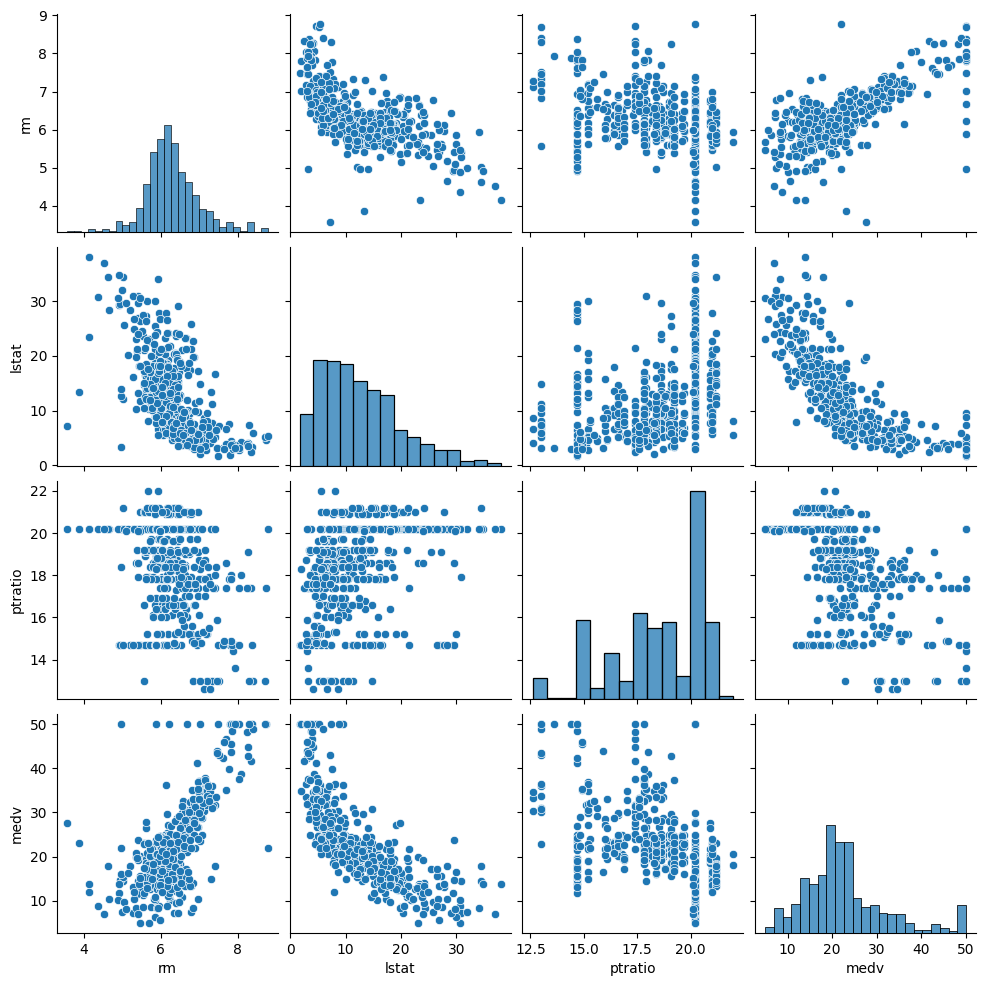

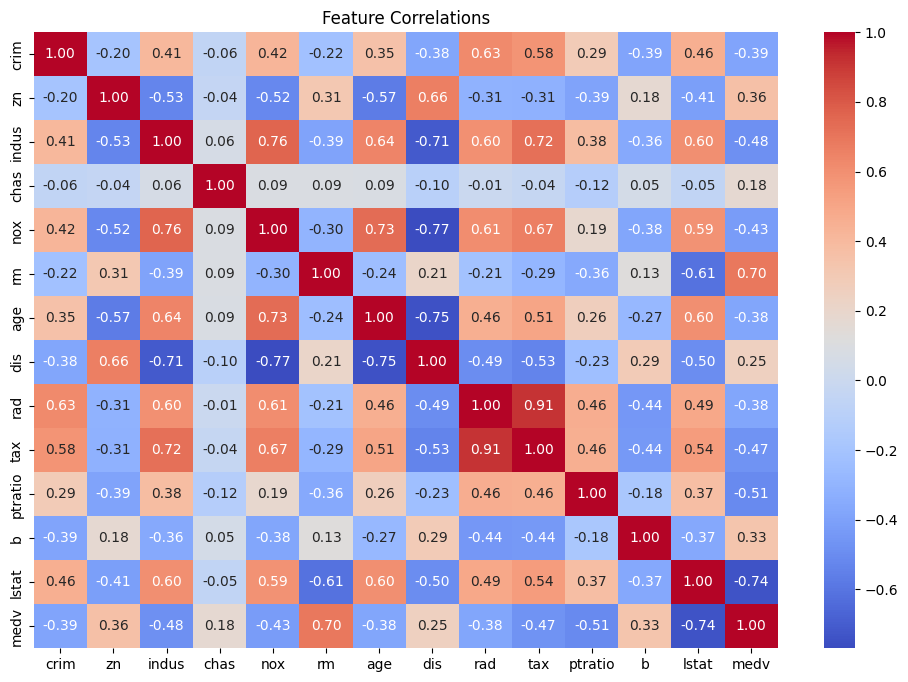

In [6]:
# Check for missing values
print(df.info())
print(df.describe())

# Pairplot for correlation insights
sns.pairplot(df[['rm', 'lstat', 'ptratio', 'medv']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()


# 📈 3. Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Features and target
X = df[['rm', 'lstat', 'ptratio']]
y = df['medv']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)


# 🔧 4. Regularized Regression (Ridge, Lasso)

In [10]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Compare models
models = {'Ridge': ridge, 'Lasso': lasso}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"{name} R2 Score: {r2_score(y_test, y_pred):.4f}")


Ridge R2 Score: 0.6305
Lasso R2 Score: 0.6318


# 🌲 5. Random Forest Regressor

Random Forest R2 Score: 0.7375694314080177
Random Forest RMSE: 4.386915364098639


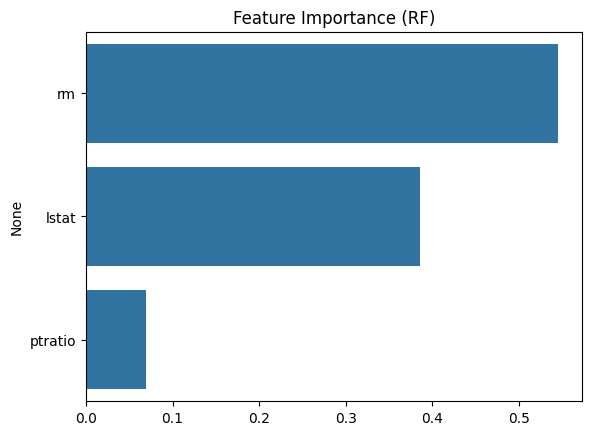

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))

# Feature importances
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Feature Importance (RF)")
plt.show()


## Extra excercies

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
X = df.drop("medv", axis=1)
y = df["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 1. Add additional features 
# Already done: using all features
lr_all = LinearRegression()
lr_all.fit(X_train_scaled, y_train)
y_pred_all = lr_all.predict(X_test_scaled)

print("R² with all features:", r2_score(y_test, y_pred_all))

R² with all features: 0.668759493535632


In [15]:
# 2. Polynomial Regression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_poly_pred = lr_poly.predict(X_poly_test)

print("Polynomial Regression R²:", r2_score(y_test, y_poly_pred))


Polynomial Regression R²: 0.8055829447972163


In [16]:
# 3. Hyperparameter Tuning with GridSearchCV (Ridge & Lasso)

alphas = {'alpha': np.logspace(-4, 4, 50)}

ridge_cv = GridSearchCV(Ridge(), alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

lasso_cv = GridSearchCV(Lasso(max_iter=10000), alphas, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

print("Best Ridge α:", ridge_cv.best_params_, "| R²:", ridge_cv.best_score_)
print("Best Lasso α:", lasso_cv.best_params_, "| R²:", lasso_cv.best_score_)


Best Ridge α: {'alpha': np.float64(2.559547922699533)} | R²: 0.7245645850588551
Best Lasso α: {'alpha': np.float64(0.0001)} | R²: 0.7244337031804722


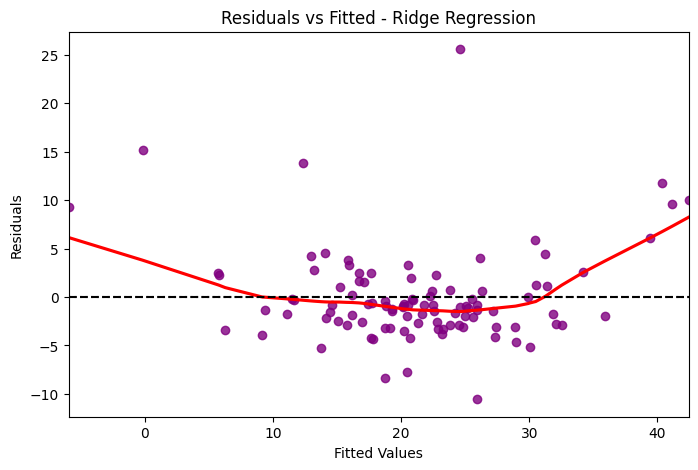

In [17]:
# 4. Residuals vs Fitted Values

y_pred = ridge_cv.predict(X_test_scaled)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple", line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted - Ridge Regression")
plt.axhline(0, color='black', linestyle='--')
plt.show()




In [18]:
# 5. Cross-Validation Average Score Comparison

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=ridge_cv.best_params_['alpha']),
    "Lasso": Lasso(alpha=lasso_cv.best_params_['alpha']),
    "GBR": GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} CV Average R²: {np.mean(scores):.3f}")


Linear CV Average R²: 0.724
Ridge CV Average R²: 0.725
Lasso CV Average R²: 0.724
GBR CV Average R²: 0.851


Gradient Boosting R²: 0.915281217869321


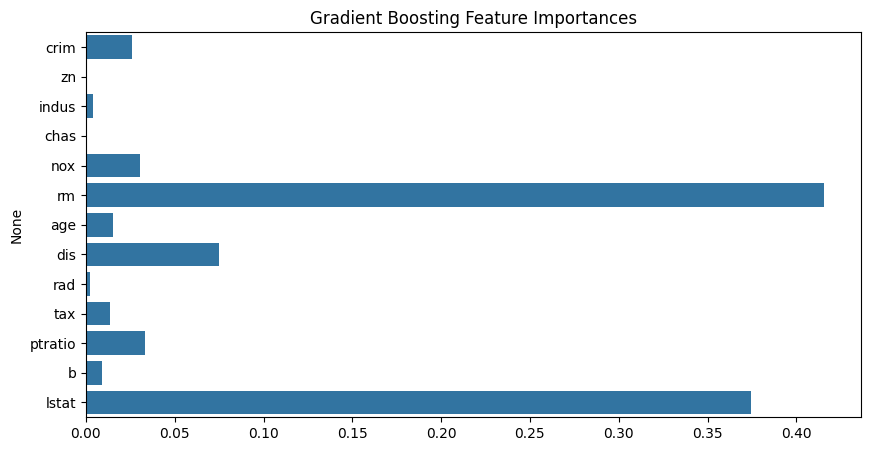

In [20]:
# 6. Try GradientBoostingRegressor or XGBoost

gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gbr))

# Feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=gbr.feature_importances_, y=X.columns)
plt.title("Gradient Boosting Feature Importances")
plt.show()


In [24]:
import pandas as pd
import numpy as np
 
from sklearn.linear_model import LinearRegression, Ridge

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Create a combined comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "LinearRegression": y_pred_lr,
    "Ridge": y_pred_ridge,
    "GradientBoosting": y_pred_gbr
})

# Round for better readability
comparison_df_rounded = comparison_df.round(2)


comparison_df_rounded = comparison_df.round(2)
# comparison_df_rounded.to_csv("model_comparison.csv", index=False)
print("Comparison saved as 'model_comparison.csv'")
print(comparison_df_rounded.head())


Comparison saved as 'model_comparison.csv'
   Actual  LinearRegression  Ridge  GradientBoosting
0    23.6             29.00  28.69             23.45
1    32.4             36.03  35.70             31.46
2    13.6             14.82  14.15             17.93
3    22.8             25.03  24.78             24.02
4    16.1             18.77  19.12             17.68


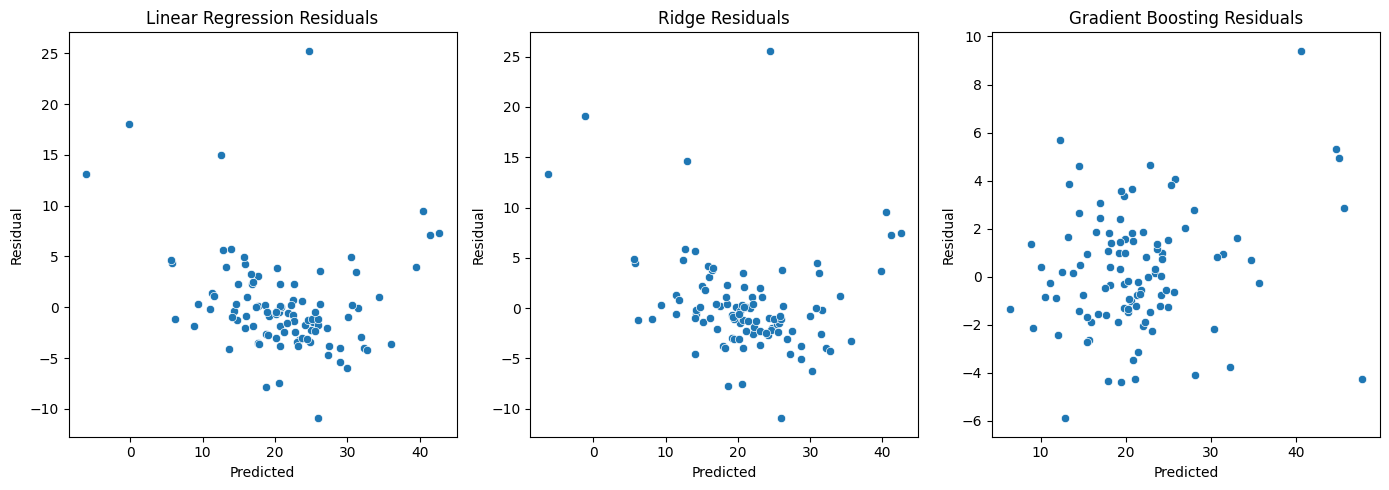

In [25]:
# 📊 Optional Visualisation: Residual Plot for Each Model

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (Actual - Predicted)
comparison_df["Residual_LR"] = comparison_df["Actual"] - comparison_df["LinearRegression"]
comparison_df["Residual_Ridge"] = comparison_df["Actual"] - comparison_df["Ridge"]
comparison_df["Residual_GBR"] = comparison_df["Actual"] - comparison_df["GradientBoosting"]

plt.figure(figsize=(14, 5))

# Residual plot for Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=comparison_df["LinearRegression"], y=comparison_df["Residual_LR"])
plt.title("Linear Regression Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residual")

# Residual plot for Ridge
plt.subplot(1, 3, 2)
sns.scatterplot(x=comparison_df["Ridge"], y=comparison_df["Residual_Ridge"])
plt.title("Ridge Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residual")

# Residual plot for GBR
plt.subplot(1, 3, 3)
sns.scatterplot(x=comparison_df["GradientBoosting"], y=comparison_df["Residual_GBR"])
plt.title("Gradient Boosting Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()


# 📉 Evaluation Metrics Table
# Add MAE, MSE, R² for each model:

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "Linear Regression": y_pred_lr,
    "Ridge Regression": y_pred_ridge,
    "Gradient Boosting": y_pred_gbr
}

metrics = []
for name, preds in models.items():
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    metrics.append([name, mae, mse, r2])

metrics_df = pd.DataFrame(metrics, columns=["Model", "MAE", "MSE", "R²"])
print(metrics_df)


               Model       MAE        MSE        R²
0  Linear Regression  3.189092  24.291119  0.668759
1   Ridge Regression  3.132947  24.477191  0.666222
2  Gradient Boosting  1.916671   6.212749  0.915281


# 2. 🖼️ Residual Plot
# Visualise residuals:

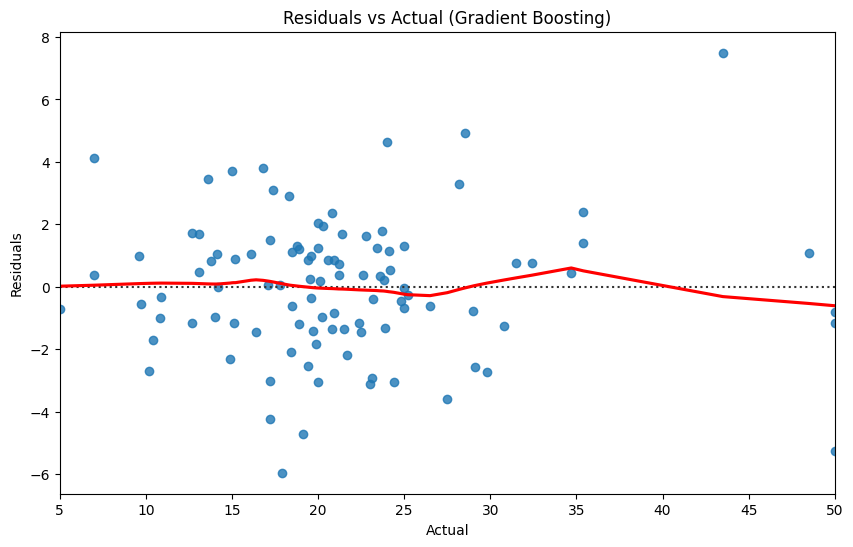

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_gbr, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Actual (Gradient Boosting)")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.show()
